In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
!rm -rf __MACOSX
!rm -rf data.zip
!rm -rf data

In [31]:
!cp '/content/drive/MyDrive/cau_temp/data.zip' ./

In [32]:
!unzip data.zip

Archive:  data.zip
replace submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: submission.csv          
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [33]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [35]:
!cp test* data
!cp train* data
!cp submission* data

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

In [37]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

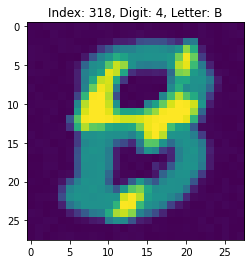

In [38]:
idx = 318
img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
digit = train.loc[idx, 'digit']
letter = train.loc[idx, 'letter']

plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
plt.imshow(img)
plt.show()

In [39]:
x_train = train.drop(['id', 'digit', 'letter'], axis=1).values
x_train = x_train.reshape(-1, 28, 28, 1)
x_train = x_train/255

y = train['digit']
y_train = np.zeros((len(y), len(y.unique())))
for i, digit in enumerate(y):
    y_train[i, digit] = 1

In [40]:
def create_cnn_model(x_train):
    inputs = tf.keras.layers.Input(x_train.shape[1:])

    bn = tf.keras.layers.BatchNormalization()(inputs)
    conv = tf.keras.layers.Conv2D(128, kernel_size=5, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(128, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)

    bn = tf.keras.layers.BatchNormalization()(pool)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)

    flatten = tf.keras.layers.Flatten()(pool)

    bn = tf.keras.layers.BatchNormalization()(flatten)
    dense = tf.keras.layers.Dense(1000, activation='relu')(bn)

    bn = tf.keras.layers.BatchNormalization()(dense)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(bn)

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

    return model

In [76]:
model = create_cnn_model(x_train)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
base_history = model.fit(x_train, y_train, epochs=10)


Epoch 1/10
64/64 [==============================] - 2s 12ms/step - loss: 2.4957 - accuracy: 0.4468
Epoch 2/10
64/64 [==============================] - 1s 12ms/step - loss: 0.8523 - accuracy: 0.7275
Epoch 3/10
64/64 [==============================] - 1s 12ms/step - loss: 0.5332 - accuracy: 0.8149
Epoch 4/10
64/64 [==============================] - 1s 12ms/step - loss: 0.2938 - accuracy: 0.8984
Epoch 5/10
64/64 [==============================] - 1s 12ms/step - loss: 0.1930 - accuracy: 0.9370
Epoch 6/10
64/64 [==============================] - 1s 12ms/step - loss: 0.1483 - accuracy: 0.9478
Epoch 7/10
64/64 [==============================] - 1s 12ms/step - loss: 0.1217 - accuracy: 0.9595
Epoch 8/10
64/64 [==============================] - 1s 12ms/step - loss: 0.0892 - accuracy: 0.9756
Epoch 9/10
64/64 [==============================] - 1s 12ms/step - loss: 0.0661 - accuracy: 0.9810
Epoch 10/10
64/64 [==============================] - 1s 12ms/step - loss: 0.0429 - accuracy: 0.9873


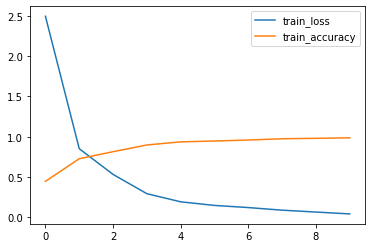

In [77]:
plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['accuracy'], label='train_accuracy')
plt.legend()
plt.show()

In [64]:
x_test = test.drop(['id', 'letter'], axis=1).values
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test/255

submission = pd.read_csv('data/submission.csv')
submission['digit'] = np.argmax(model.predict(x_test), axis=1)
submission.head()

,id,digit
0,2049,6
1,2050,7
2,2051,6
3,2052,0
4,2053,3


In [43]:
|submission.to_csv('baseline.csv', index=False)

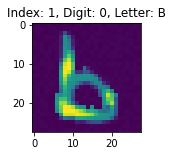

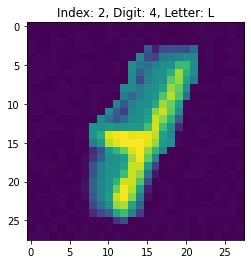

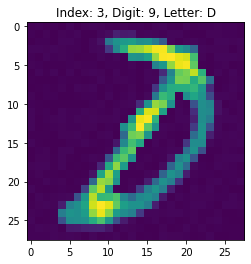

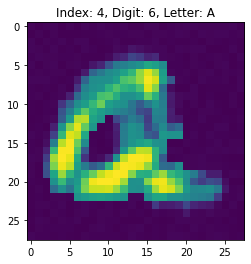

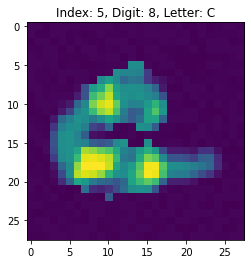

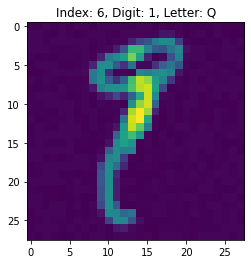

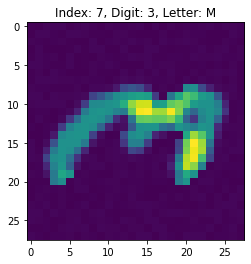

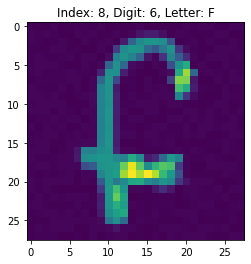

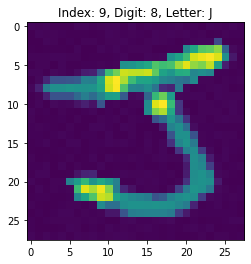

In [46]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    idx = i
    img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
    digit = train.loc[idx, 'digit']
    letter = train.loc[idx, 'letter']
    plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
    plt.imshow(img)
    plt.show()